# first neural network: basic classification #

照著官網的例子實作。
網址：https://www.tensorflow.org/tutorials/keras/basic_classification

這個例子中使用`keras`以及`MNIST` dataset。

`keras` 是`tensorflow`(之後一律簡寫`tf`)的high level api。
`MNIST`是一個範例資料集。

In [1]:
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


# import the fashion MNIST dataset #

這個範例使用資料集中的範例資料集，其中包含70,000筆灰階圖片，10個分類。
每一筆圖片為一28*28 pixels的低解析灰階圖。

`fashion MNIST`資料集為非常常在電腦視覺中使用的 `hello, world`資料集

我使用60,000 trainging , 10,000 testing

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# explore the data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ..., 3 0 5]


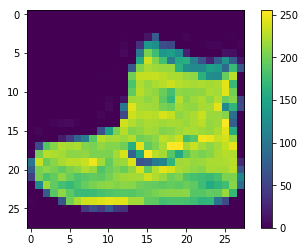

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# preprocessed 
# it's important that train and test must be preprocessed in the same way
train_images = train_images / 255.0

test_images = test_images / 255.0

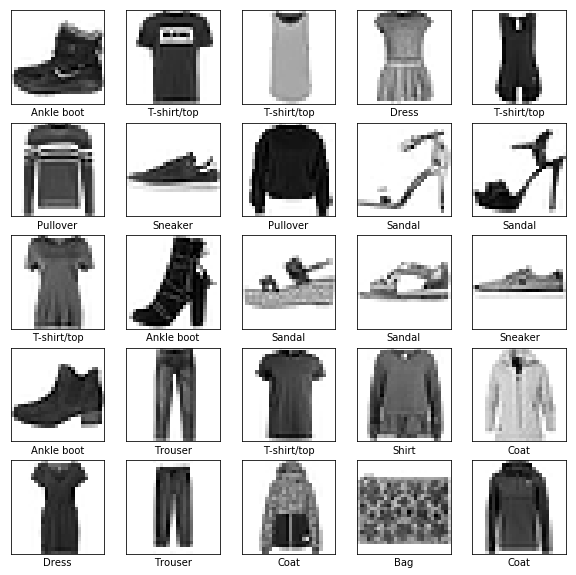

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 從class_names中取得labels代表的class名稱
    # class_names 為一陣列，index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 建立模型 #

建立一個類神經網路模型，首先必須先設定模型的layers，之後再編譯模型。

## 設定 layers (setup layers) ##

類神經網路的最基楚模塊（bolck）為layer。layer從input中截取出data中的特徴值，並且嘗試去解析它
（類神經網路的運作為黑盒子，所以並不能確定取出的特微值是真的有用的。）

大多數的深蹲學習是由無數層的simple layers取合而成。大分的layers，如 `tf.keras.layers.Dense`，其參數是在訓練階段時學習而得。

In [7]:
# 設定layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

上面的models中，使用了`keras` API中的兩種layers: `Dense` 及 `Flatten`

網路中的第一層為 `Flatten`，它會將資料扁平化。
如我們例子為一28*28 pixel的二維陣列，它會將其轉化為一維陣列，其中包含28*28 = 784 個pixels點。

可以直接把這層想像為轉譯資料。這層layer並沒有任何需要學習的參數。

這層layers後，接下來是兩個連續的 `Dense layers`
（先不要管它怎麼實作的）

第一層為一128個神經元的 dense layers。第二層為一10個神經元的layers。
其出來的結果為10個機率值，且這個機率值合為1。
每一個神經元得出的機率值代表input為某個類別的機率（範例有十個類別）。

## compile models ##

再開始training model前，還有幾個設定動作必須完成，這幾個設定動作在compile期間設定完成。

* `Loss function`:  loss function 用來評量模型的準確度。我們要將`loss function`最小化，來讓模型往「正確地方向」學習。
* `Optimizer`: Optimizer會決定模型如何更新。更新準則會透過它「看到」的資料以及`loss function`
* `Metrics`: 評估方式，用來在training 和 testing中監控模型的「精度」。例子中使用準確度（accuracy）當作metrics。


In [8]:
# compile phase
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training phase
'''
訓練類神經模型包含以下3個步驟：
1、將training資料餵給model
2、模習學習分類
3、透過testing data去驗証模型的準確度。
'''
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.4995 - acc: 0.8230
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3763 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3388 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3145 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2977 - acc: 0.8911


In [10]:
# evaluate phase
# 這個階投可以用來判斷model有沒有over fitting
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/step
Test accuracy: 0.8661


In [11]:
# make prediction
predictions = model.predict(test_images)

#check predictions result
print(predictions[0])
print(np.argmax(predictions[0]))

[  2.59671924e-06   7.31020522e-10   2.47800415e-07   2.15654983e-09
   1.97547493e-07   3.30159930e-03   5.40081032e-07   9.22977738e-03
   3.29102068e-06   9.87461746e-01]
9


In [12]:
def plot_image(i, predictions_array, true_label, img):
  """
  plot image
  """
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  # 判斷預測是否正確
  # true 為 藍色，false為紅色
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  # label線示 class 名稱，信心值
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #長條圖
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  # 預測結果為紅色，正確結果為藍色
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

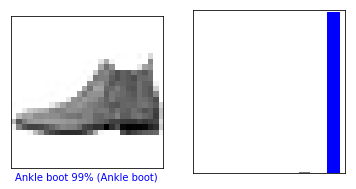

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

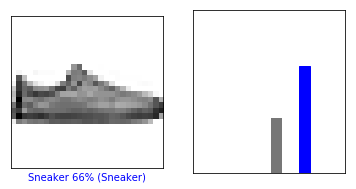

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

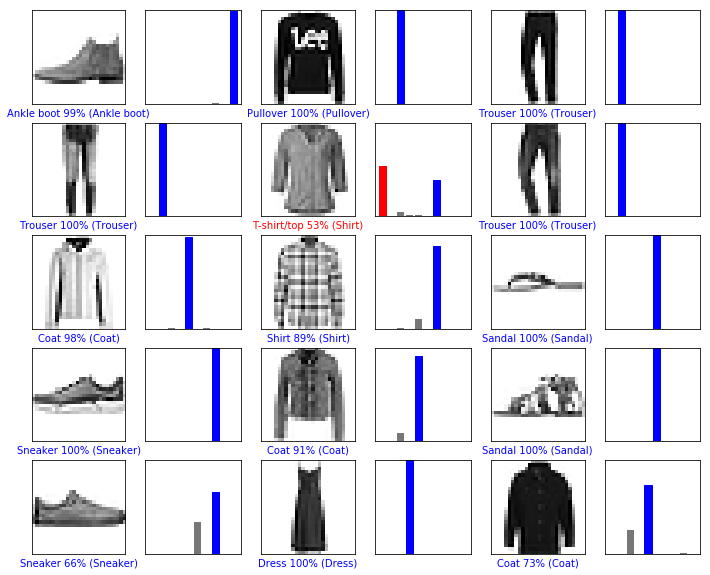

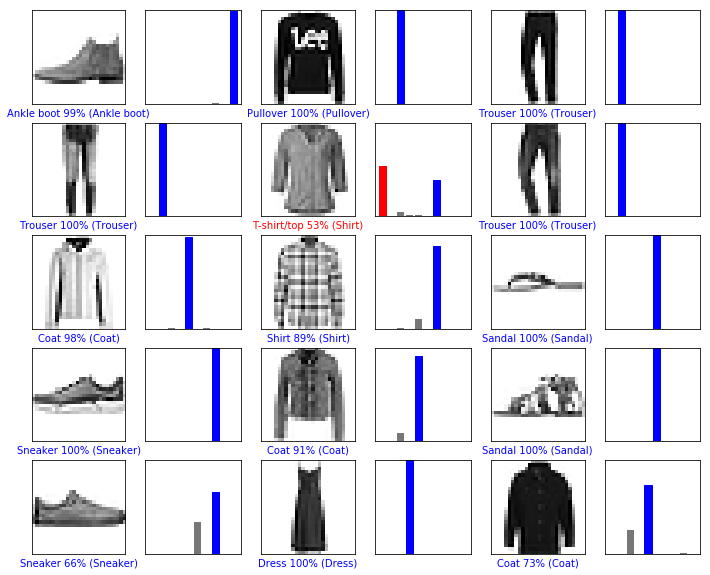

In [17]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# 使用模型 #

以上，資料前處理、訓練模型、模型評做、測試模型的動作都已經完成，
之後可以使用該模型來對圖片做分類。

tf的`keras` api提供了優化了的預測方法：`batch`（`collection`）。
因此，即使我們只有一張圖片，我們仍需把它加入`list`中。

最後，`model.predict`回傳一個list，其中是預測的結果。

`keras`模型在做機器學習時，可以當作一個非常好的簡單實驗方式。

(28, 28)
(1, 28, 28)
[[  2.59671424e-06   7.31021910e-10   2.47800415e-07   2.15654583e-09
    1.97547493e-07   3.30159604e-03   5.40081544e-07   9.22978204e-03
    3.29101749e-06   9.87461746e-01]]


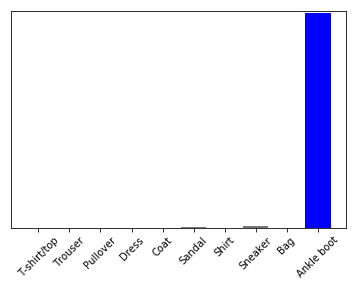

9

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
np.argmax(predictions_single[0])

In [24]:
a = [1,2,3,4,5,6,7,8,9]
for i, _ in enumerate(a):
    print(i)
    


0
1
2
3
4
5
6
7
8
